In [1]:
#importing all required library

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import joblib
import warnings
warnings.filterwarnings("ignore")


In [2]:
#uploading test dataset
test=pd.read_csv("Doctor_Final_Test.csv")
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [3]:
#uploading train dataset
#we have to use encoding=latin1 because this dataset has some sepcial charecter to read
train=pd.read_csv("Doctor_Final_Train.csv",encoding='latin1')
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
print(test.info())
print('**********************')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB
None
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object

In [5]:
print(test.shape)
print('*************')
print(train.shape)

(1987, 6)
*************
(5961, 7)


In [6]:
print(test.dtypes)
print('**************')
print(train.dtypes)

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object
**************
Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object


In [7]:
#lets check the null value in both dataset
print(test.isnull().sum())
print('*****************')
print(train.isnull().sum())

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64
*****************
Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


As we can see that there are so many null values in 'Rating','Place' and 'Miscellaneous_Info' column so we have to fill the null values

In [8]:
#filling null values of rating column
test['Rating'].fillna(value=test['Rating'].mode()[0],inplace=True)
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,100%,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,100%,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,100%,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,100%,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,100%,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,100%,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [9]:
#filling null values
train['Rating'].fillna(value=train['Rating'].mode()[0],inplace=True)
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [10]:
#filling null values of 'place' columns in both dataset
train['Place'].fillna('None,None',inplace=True)
test['Place'].fillna('None,None',inplace=True)

In [11]:
#we can drop Miscellaneous_info column from both dataset because as the information given in this column are already present in another columns too.
test.drop(['Miscellaneous_Info'],axis=1,inplace=True)   
test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,100%,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,100%,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,100%,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,100%,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,100%,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,100%,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [12]:
#we can drop Miscellaneous_info column from both dataset because as the information given in this column are already present in another columns too.
train.drop(['Miscellaneous_Info'],axis=1,inplace=True)   
train

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


AxesSubplot(0.125,0.125;0.62x0.755)


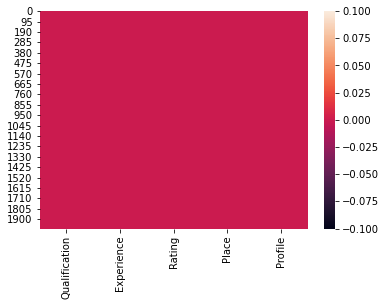

In [13]:
print(sns.heatmap(test.isnull()))


AxesSubplot(0.125,0.125;0.62x0.755)


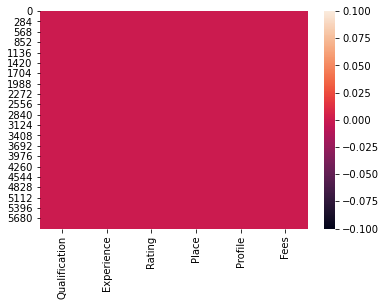

In [14]:
print(sns.heatmap(train.isnull()))

As we can see that there are so many null values in rating and Miscellaneous_info column. #Lets deal with it.

In [15]:
print(train.isnull().sum())
print('*********************************')
print(test.isnull().sum())

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64
*********************************
Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64


As we can see that there is no null values in both dataset

In [16]:
#Splitting Place Column to find the City in test dataset
for i in range(len(test)):
    test['Place'][i]=test['Place'][i].split(",")[-1]
    
test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,100%,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,100%,Hyderabad,ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,Chennai,Dermatologists
3,BAMS,0 years experience,100%,Delhi,Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,Bangalore,Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,100%,Bangalore,Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,100%,Chennai,Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,100%,Chennai,General Medicine
1985,BDS,12 years experience,98%,Bangalore,Dentist


In [17]:
#Splitting Place Column to find the City in train dataset
for i in range(len(train)):
    train['Place'][i]=train['Place'][i].split(",")[-1]
    
train

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,100%,Bangalore,Ayurveda,250
4,BAMS,20 years experience,100%,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,Bangalore,ENT Specialist,300
5957,MBBS,33 years experience,100%,Chennai,General Medicine,100
5958,MBBS,41 years experience,97%,Delhi,General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,Mumbai,General Medicine,100


As we know datasets holds special charecters and null values too so we are to treat all null values as 1 and 0, and remove special charecters and only put numeric numbers

In [18]:
#first we will solve the experience column values, we will remove all the text values and only put numeric values there
# Converting Experience into Numeric
for i in range(len(test)):
    test['Experience'][i]=test['Experience'][i][:-17]
    
test['Experience']=test['Experience'].astype(int)

test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,100%,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100%,Hyderabad,ENT Specialist
2,"MBBS, DDVL",40,70%,Chennai,Dermatologists
3,BAMS,0,100%,Delhi,Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,Bangalore,Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,100%,Bangalore,Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,100%,Chennai,Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,100%,Chennai,General Medicine
1985,BDS,12,98%,Bangalore,Dentist


In [19]:
# Converting Experience into Numeric
for i in range(len(train)):
    train['Experience'][i]=train['Experience'][i][:-17]
    
train['Experience']=train['Experience'].astype(int)

train

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100%,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98%,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,100%,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12,100%,Bangalore,Ayurveda,250
4,BAMS,20,100%,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,Bangalore,ENT Specialist,300
5957,MBBS,33,100%,Chennai,General Medicine,100
5958,MBBS,41,97%,Delhi,General Medicine,600
5959,"MBBS, MD - General Medicine",15,90%,Mumbai,General Medicine,100


In [20]:
# Converting Rating into Numeric
for i in range(len(test)):
    test['Rating'][i]=test['Rating'][i][:-1] 
test['Rating']=test['Rating'].astype(int)

test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,100,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100,Hyderabad,ENT Specialist
2,"MBBS, DDVL",40,70,Chennai,Dermatologists
3,BAMS,0,100,Delhi,Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Bangalore,Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,100,Bangalore,Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,100,Chennai,Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,100,Chennai,General Medicine
1985,BDS,12,98,Bangalore,Dentist


In [21]:
# Converting Rating into Numeric
for i in range(len(train)):
    train['Rating'][i]=train['Rating'][i][:-1]
train['Rating']=train['Rating'].astype(int)

train

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,100,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12,100,Bangalore,Ayurveda,250
4,BAMS,20,100,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,Bangalore,ENT Specialist,300
5957,MBBS,33,100,Chennai,General Medicine,100
5958,MBBS,41,97,Delhi,General Medicine,600
5959,"MBBS, MD - General Medicine",15,90,Mumbai,General Medicine,100


In [22]:
train.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,97.610636,307.944640
std,11.142798,5.881539,190.920373
min,0.000000,7.000000,5.000000
25%,9.000000,98.000000,150.000000
50%,14.000000,100.000000,300.000000
75%,23.000000,100.000000,500.000000
max,66.000000,100.000000,950.000000


We can observe that mostly rating is 100% and not much difference in mean and median percantage. High standard daviation is in Fees column

In [23]:
test.describe()

,Experience,Rating
count,1987.000000,1987.000000
mean,17.874685,97.490689
std,11.366764,5.793117
min,0.000000,52.000000
25%,9.000000,98.000000
50%,15.000000,100.000000
75%,24.000000,100.000000
max,65.000000,100.000000


In [24]:
print(test['Place'].value_counts())
print('**************************************')
print(train['Place'].value_counts())

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
None                     6
Name: Place, dtype: int64
**************************************
 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
None                     25
e                         1
Name: Place, dtype: int64


We can observe that most of Doctors are from Banglore, Mumbai and Delhi, In train dataset there is one city named 'e', it may be spelling mistake so we can remove it

In [25]:
train=train[train['Place']!='e']
train['Place'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
None                     25
Name: Place, dtype: int64

In [26]:
print(test['Qualification'].value_counts())
print('**************************************')
print(train['Qualification'].value_counts())

BAMS                                                                                      153
BHMS                                                                                      150
BDS                                                                                       144
MBBS                                                                                      107
MBBS, MD - Dermatology                                                                     64
                                                                                         ... 
DNB - Dermatology & Venereology, MNAMS - DERMATOLOGY, F.C.P.S (Dermatology), DDV, MBBS      1
MS - Otorhinolaryngology, MBBS, DNB - ENT                                                   1
MBBS, MS - ENT, FRCS, MRCS (UK), Dip Otolaryngology and Head and neck Surgery               1
BHMS, MSc                                                                                   1
BAMS, Certificate Course in Kshar Sutra Surgery             

we can see that most of doctors of BDS, BHMS, BAMS, MBBS, MBBS, MS-ENT

In [27]:
train['Profile'].value_counts()

Dentist             1396
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

# Data Visualization

# Univariate Analysis test dataset

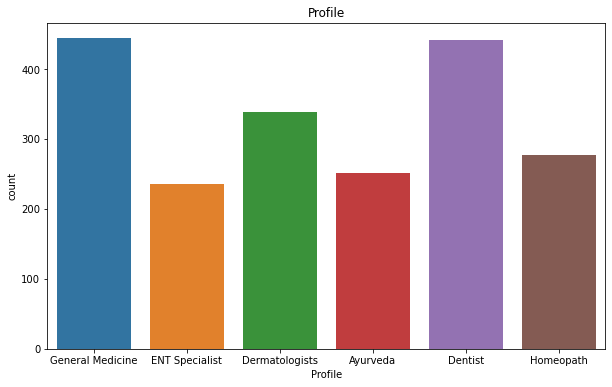

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64


In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Profile',data=test)
plt.title('Profile')
plt.show()
print(test['Profile'].value_counts())

Higest number of doctor of General Medicine, Dentist, dermatilogists

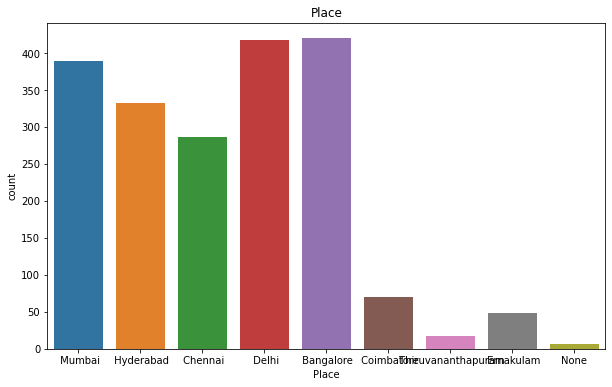

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
None                     6
Name: Place, dtype: int64


In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='Place',data=test)
plt.title('Place')
plt.show()
print(test['Place'].value_counts())

Higest number of doctor from Banglore, Delgi, Mumbai,Hyderabad

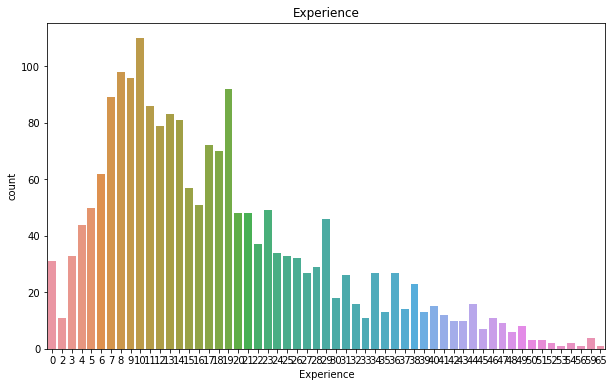

10    110
8      98
9      96
19     92
7      89
11     86
13     83
14     81
12     79
17     72
18     70
6      62
15     57
16     51
5      50
23     49
21     48
20     48
29     46
4      44
22     37
24     34
3      33
25     33
26     32
0      31
28     29
27     27
34     27
36     27
31     26
38     23
30     18
32     16
44     16
40     15
37     14
39     13
35     13
41     12
33     11
2      11
46     11
42     10
43     10
47      9
49      8
45      7
48      6
59      4
50      3
51      3
52      2
54      2
53      1
56      1
65      1
Name: Experience, dtype: int64


In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='Experience',data=test)
plt.title('Experience')
plt.show()
print(test['Experience'].value_counts())

most of doctors has experience between 10 to 40 years

<AxesSubplot:xlabel='Rating', ylabel='count'>

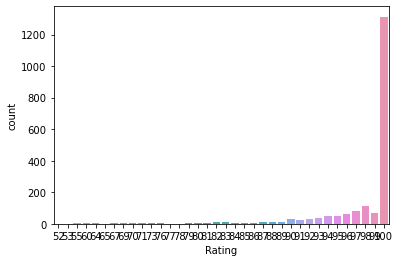

In [31]:
sns.countplot(x='Rating',data=test)

# Univariate Analysis train dataset

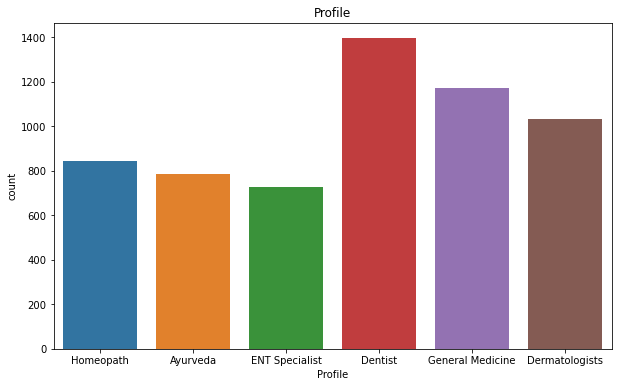

Dentist             1396
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='Profile',data=train)
plt.title('Profile')
plt.show()
print(train['Profile'].value_counts())

Higest number of doctor of General Medicine, Dentist, dermatilogists

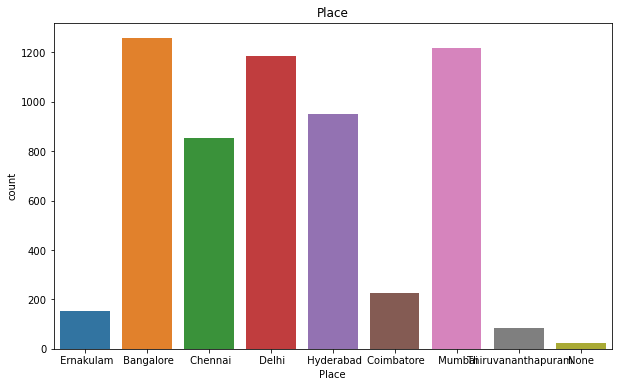

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
None                     25
Name: Place, dtype: int64


In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='Place',data=train)
plt.title('Place')
plt.show()
print(train['Place'].value_counts())

Higest number of doctor from Banglore, Delgi, Mumbai,Hyderabad

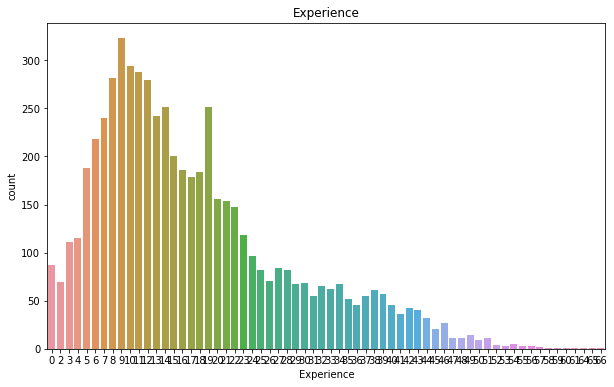

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64


In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='Experience',data=train)
plt.title('Experience')
plt.show()
print(train['Experience'].value_counts())

most of doctors has experience between 10 to 40 years

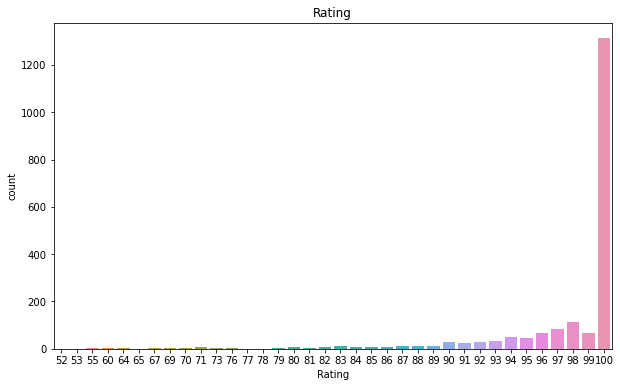

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='Rating',data=test)
plt.title('Rating')
plt.show()


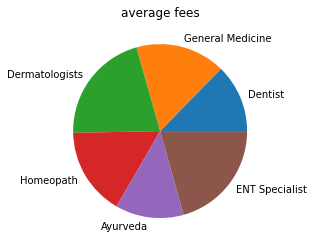

In [36]:
profile=train['Profile'].value_counts().index
arr=[]
for i in profile:
  x=train[train['Profile']==i]
  arr.append(np.mean(x['Fees']))
plt.title('average fees')
plt.pie(arr,labels=profile)
plt.show()

Dermatilogists, GenerL Medicine and ENT doctors are getting higest fees

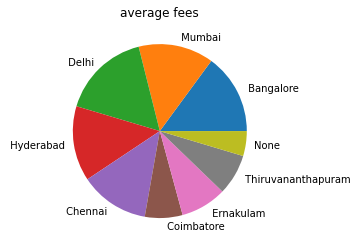

In [37]:
city=train['Place'].value_counts().index
arr=[]
for i in city:
  x=train[train['Place']==i]
  arr.append(np.mean(x['Fees']))
plt.title('average fees')
plt.pie(arr,labels=city)
plt.show()

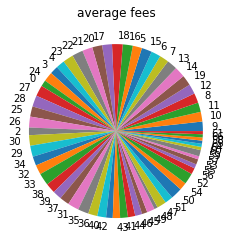

In [38]:
exp=train['Experience'].value_counts().index
arr=[]
for i in exp:
  x=train[train['Experience']==i]
  arr.append(np.mean(x['Fees']))
plt.title('average fees')
plt.pie(arr,labels=exp)
plt.show()

<AxesSubplot:xlabel='Fees'>

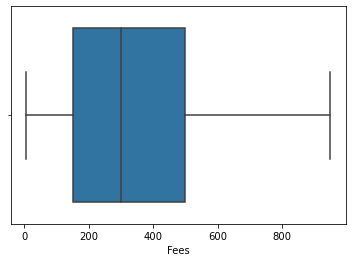

In [39]:
sns.boxplot(x='Fees',data=train)

<AxesSubplot:xlabel='Experience'>

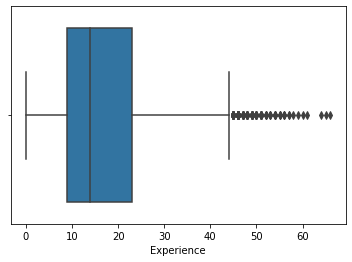

In [40]:
sns.boxplot(x='Experience',data=train)

# Bivariate Analysis test dataset

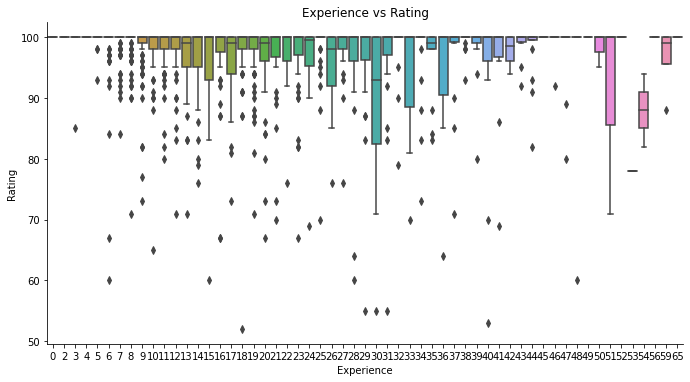

In [41]:
sns.catplot(x='Experience',y='Rating',data=test,kind='box',height=5,aspect=1.9)
plt.title('Experience vs Rating')
plt.show()

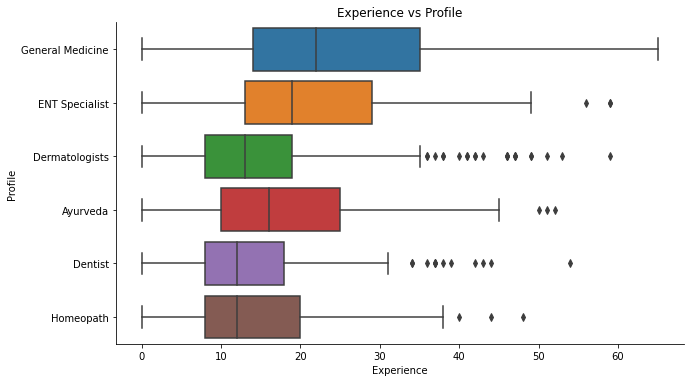

In [42]:
sns.catplot(x='Experience',y='Profile',data=test,kind='box',height=5,aspect=1.9)
plt.title('Experience vs Profile')
plt.show()

General medicine, ENT, Ayurveda doctor has high experience

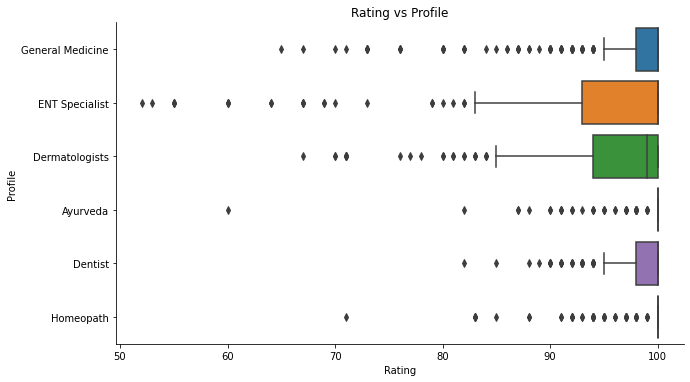

In [43]:
sns.catplot(x='Rating',y='Profile',data=test,kind='box',height=5,aspect=1.9)
plt.title('Rating vs Profile')
plt.show()

# Bivariate Analysis train dataset

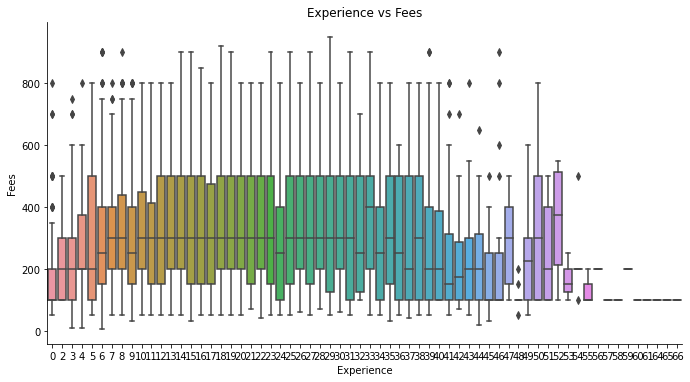

In [44]:
sns.catplot(x='Experience',y='Fees',data=train,kind='box',height=5,aspect=1.9)
plt.title('Experience vs Fees')
plt.show()

between 10 to 40 years of experienced doctora are getting high fees

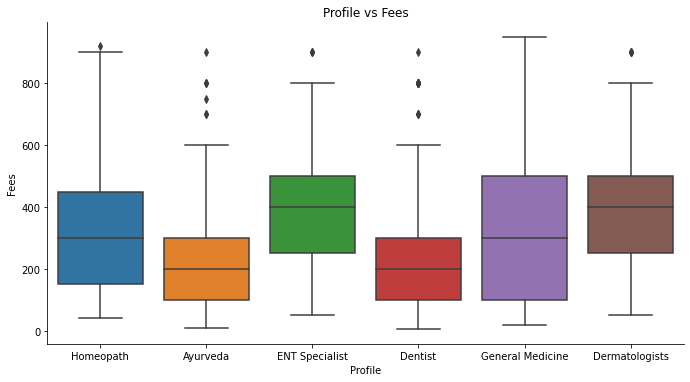

In [45]:
sns.catplot(x='Profile',y='Fees',data=train,kind='box',height=5,aspect=1.9)
plt.title('Profile vs Fees')
plt.show()

ENT Specialists and Dermatologists Consulation Fees are higher., Ayurveda and Densits fees are lower

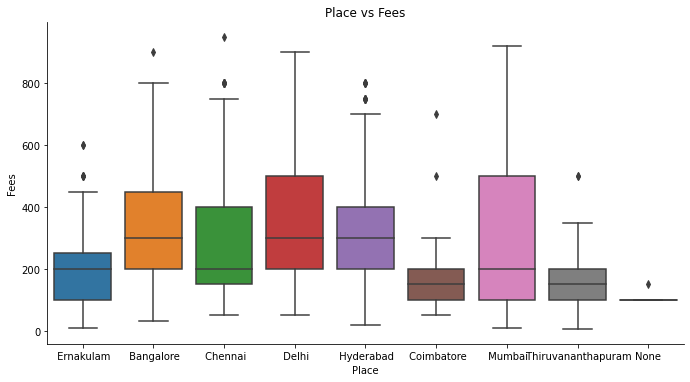

In [46]:
sns.catplot(x='Place',y='Fees',data=train,kind='box',height=5,aspect=1.9)
plt.title('Place vs Fees')
plt.show()

Banglore, delhi, Hyderabad city doctors getting high fees

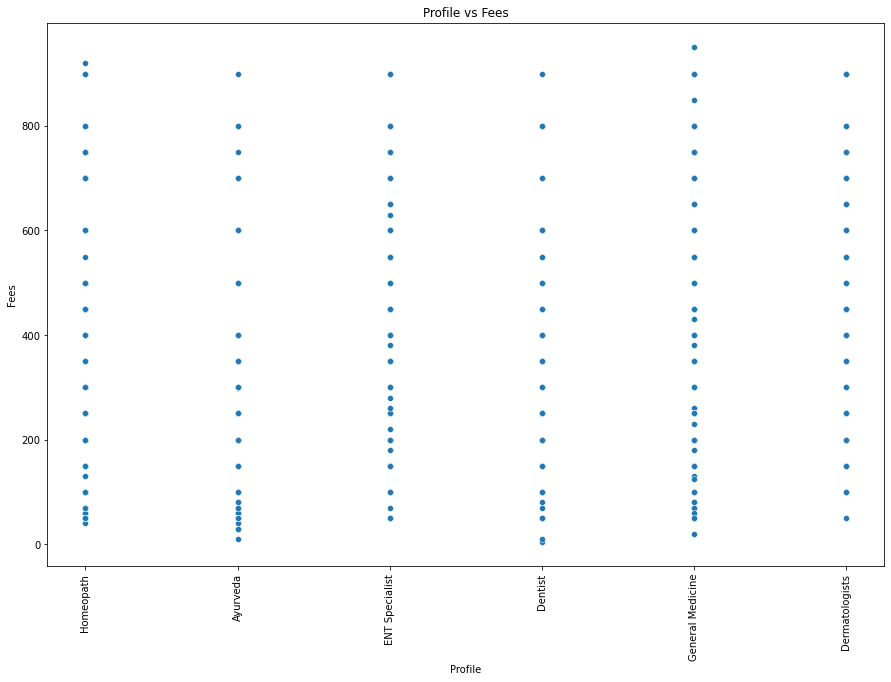

In [47]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.scatterplot(x=train['Profile'],y=train['Fees'],data=train)
plt.title('Profile vs Fees')
plt.show()

In [48]:
train.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [49]:
test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

# Label Encoder test dataset

In [50]:
#Encoding Place and Profile Column into Numeric Values
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Place','Profile']
for val in list1:
    test[val]=le.fit_transform(test[val].astype(str))

In [51]:
test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,100,6,4
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100,5,3
2,"MBBS, DDVL",40,70,1,2
3,BAMS,0,100,3,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,0,1
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,100,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,100,1,2
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,100,1,4
1985,BDS,12,98,0,1


# Label Encoder train dataset

In [52]:
#Encoding Place and Profile Column into Numeric Values
le=LabelEncoder()
list1=['Place','Profile']
for val in list1:
    train[val]=le.fit_transform(train[val].astype(str))
    
train

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100,4,5,100
1,"BAMS, MD - Ayurveda Medicine",12,98,0,0,350
2,"MBBS, MS - Otorhinolaryngology",9,100,0,3,300
3,"BSc - Zoology, BAMS",12,100,0,0,250
4,BAMS,20,100,1,0,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,0,3,300
5957,MBBS,33,100,1,4,100
5958,MBBS,41,97,3,4,600
5959,"MBBS, MD - General Medicine",15,90,6,4,100


# Multivariate Analysis test dataset

In [53]:
test_corr=test.corr()
test_corr

,Experience,Rating,Place,Profile
Experience,1.000000,-0.135230,-0.008124,0.154077
Rating,-0.135230,1.000000,0.050697,-0.037941
Place,-0.008124,0.050697,1.000000,0.029252
Profile,0.154077,-0.037941,0.029252,1.000000


<AxesSubplot:>

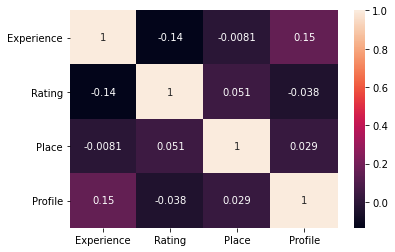

In [54]:
sns.heatmap(test_corr,annot=True)

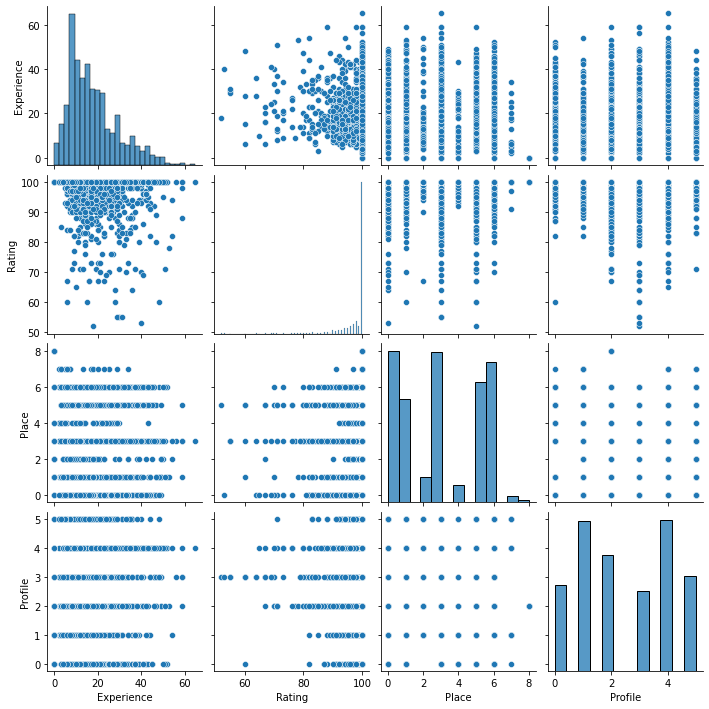

In [55]:
sns.pairplot(test)

# Multivariate Analysis train dataset

In [56]:
train_corr=train.corr()
train_corr

,Experience,Rating,Place,Profile,Fees
Experience,1.000000,-0.149635,0.017440,0.202165,0.002143
Rating,-0.149635,1.000000,0.069931,-0.046958,-0.154696
Place,0.017440,0.069931,1.000000,-0.014722,-0.035803
Profile,0.202165,-0.046958,-0.014722,1.000000,0.145192
Fees,0.002143,-0.154696,-0.035803,0.145192,1.000000


<AxesSubplot:>

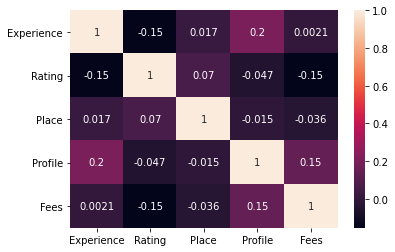

In [57]:
sns.heatmap(train_corr,annot=True)

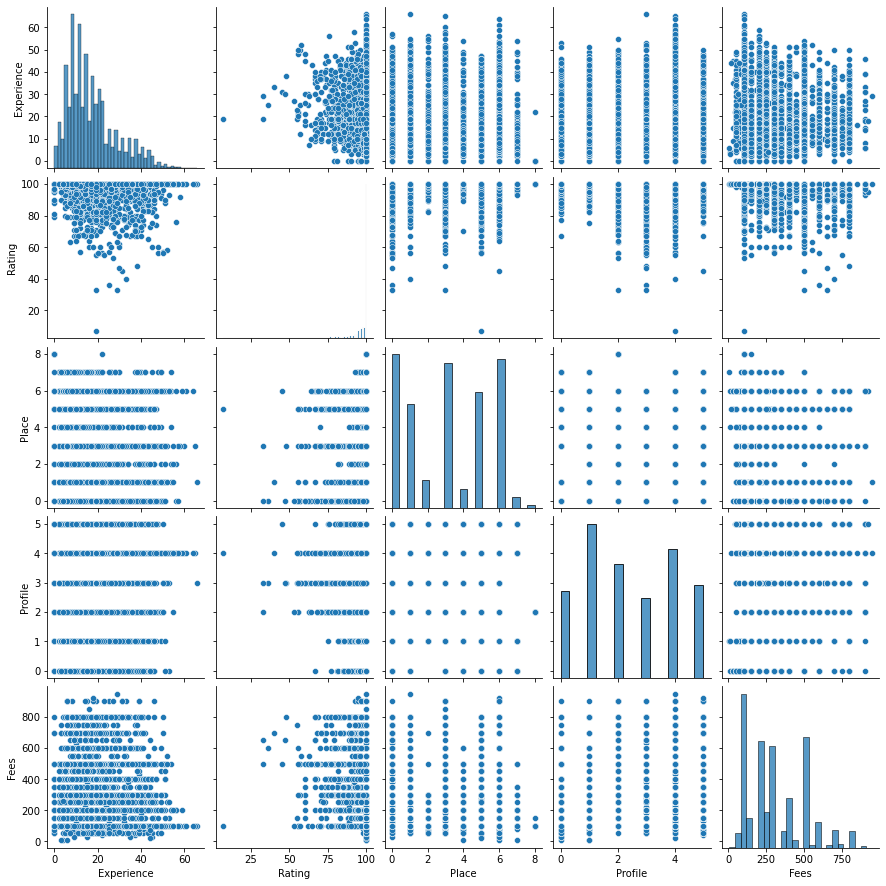

In [58]:
sns.pairplot(train)

# No need to treat and check outliers and skewness because all columns and data are important

Target and input variable

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
#seprating data into independent and target variables
train_new=train[['Experience','Rating','Place','Profile','Fees']]

x_train=train_new[['Experience','Rating','Place','Profile']]
y_train=train_new[['Fees']]
x_test=test

# Model Run, Train, Test ,Split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4648, 4)
(1312, 4)
(4648, 1)
(1312, 1)


we are sending 22% of data for testing 

In [62]:
x_train

,Experience,Rating,Place,Profile
5960,17,100,3,1
2928,3,100,2,4
2599,39,100,4,3
4036,4,100,3,1
4063,19,100,6,5
...,...,...,...,...
2064,12,99,6,1
2325,8,100,6,2
2303,20,100,0,1
3392,9,100,6,2


In [63]:
y_train

,Fees
5960,200
2928,100
2599,200
4036,200
4063,500
...,...
2064,300
2325,500
2303,300
3392,600


As we can see that target variables are continue so we can understand that this is Linear Regression Problem and have to solve with it.

In [64]:
print(x_train.info())
print('********************************')
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 5960 to 5957
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Experience  4648 non-null   int32
 1   Rating      4648 non-null   int32
 2   Place       4648 non-null   int32
 3   Profile     4648 non-null   int32
dtypes: int32(4)
memory usage: 108.9 KB
None
********************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 5960 to 5957
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Fees    4648 non-null   int64
dtypes: int64(1)
memory usage: 72.6 KB
None


# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [66]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print('*****************')
print(lr.intercept_)
print('***************')
print(lr.score(x_train,y_train))


[[-0.67272361 -4.73129121 -0.98014276 16.73910562]]
*****************
[744.03820105]
***************
0.042897796121392995


In [67]:
pred=lr.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

Predicted value: [[262.27944379]
 [302.71332562]
 [305.10446683]
 ...
 [304.10056392]
 [279.74915835]
 [316.20458381]]
actual value:       Fees
1686   300
4803   200
349    350
1763   500
2080   800
...    ...
2859   700
3697   200
4876   200
2718   500
2788   100

[1312 rows x 1 columns]


In [68]:
#finding r2 score and mean squar error in model 

print("error:")

print("Mean absolute error:", mean_absolute_error(y_test, pred))
print("Mean squared error:", mean_squared_error(y_test,pred))

print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))


error:
Mean absolute error: 153.16579212764753
Mean squared error: 34408.54639061043
Root Mean Squared Error: 185.49540800410782


In [69]:
print(r2_score(y_test,pred))

0.05523202251460135


In [70]:
score=cross_val_score(lr,x_train,y_train,cv=5)
print(score)
print(score.mean())

[0.05323291 0.03631629 0.0345774  0.03160597 0.0492877 ]
0.04100405381573691


# Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
preddtr
dtr.score(x_train,y_train)

0.6450639403319625

In [72]:
score=cross_val_score(dtr,x_train,y_train,cv=5)
print(score)
print(score.mean())

[-0.44554322 -0.34480321 -0.45390066 -0.31401875 -0.27749193]
-0.3671515520666195


In [73]:
dtr.score(x_test,y_test)

-0.29789875196620175

# Support vector classifier

In [74]:
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
predsvr
svr.score(x_train,y_train)

0.003644617694140484

In [75]:
score=cross_val_score(svr,x_train,y_train,cv=5)
print(score)
print(score.mean())

[ 4.34899211e-03  3.22735967e-03  3.79622886e-03 -3.79225436e-03
 -8.94480669e-05]
0.0014981756415110236


In [76]:
print(r2_score(y_test,pred))

0.05523202251460135


# REGULARIZATION: L1 AND L2 REGULARIZATION

L1- LASSO REGRESSION L2- RIDGE REGRESSION

# LASSO

In [77]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [78]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.05523198398122098

In [79]:
ls.coef_

array([-0.67272155, -4.73128878, -0.98012542, 16.73906729])

In [80]:
cv_score=cross_val_score(ls,x_train,y_train,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.04100405398239286

# Ridge

In [81]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [82]:
rd=Ridge(alpha=10,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdr=r2_score(y_test,pred_rd)
rdr

0.05522846619941868

In [83]:
cv_score=cross_val_score(rd,x_train,y_train,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.041004885777886455

In [85]:
rd.coef_

array([[-0.67228402, -4.73106363, -0.98012654, 16.72535378]])

# Elasticnet Regression

In [86]:
#Elasticnet is a combination of both Lasso and Ridge
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.04289779611304356


array([-0.67271236, -4.7312847 , -0.98013372, 16.73876661])

# Prediction_ Random Forest Regressor

In [87]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)
pred_rf


array([121.81190476, 550.67936508, 389.25      , ..., 162.93333333,
       163.10952381, 141.82047619])

In [88]:
rf=r2_score(y_test,pred_rf)
print("R2 score : ",rf*100)

R2 score :  2.4529751959946444


In [89]:
pred_rf=pd.DataFrame(pred_rf, columns=['Fees'])
pred_rf

,Fees
0,121.811905
1,550.679365
2,389.250000
3,277.838889
4,374.261111
...,...
1307,611.257540
1308,228.065476
1309,162.933333
1310,163.109524


# Saving Model

In [90]:
joblib.dump(lr,"DCF.obj")

['DCF.obj']

In [91]:
DCFfile=joblib.load("DCF.obj")
DCFfile.predict(x_train)

array([[273.27145605],
       [333.88704627],
       [290.96960504],
       ...,
       [274.19371349],
       [292.45192229],
       [314.68548063]])

In [92]:
loaded_model=joblib.load(open("DCF.obj","rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.05523202251460135
